# Chi Squared Test

Null Hypothesis

#### H_0 : Two categorical variables are independent

Alternative Hypothesis

#### H_1 : Two categorical variables are not independent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

| _ | Science | Math | Art |
| --- | --- | --- | --- |
| Male | 20 | 30 | 15 |
| Female | 20 | 15 | 30 |

In [2]:
df=pd.DataFrame([[20,30,15],[20,15,30]])
df

,0,1,2
0,20,30,15
1,20,15,30


In [3]:
#Sum total
np.sum(df.sum(axis=0))

130

### Expected value

$Expected value = \frac{Row_{total} * column_{total}}{Total}$

In [4]:
rowtotal=df.iloc[0,:].sum()
coltotal=df.iloc[:,0].sum()
total=np.sum(df.sum(axis=0))
print("Row total",rowtotal)
print("Col total",coltotal)
print("Total",total)

print("Expected value at 1st row 1st column",(rowtotal*coltotal/total))

Row total 65
Col total 40
Total 130
Expected value at 1st row 1st column 20.0


In [5]:
nrows,ncols=df.shape
print("No of rows ",nrows)
print("No of cols ",ncols)

No of rows  2
No of cols  3


In [6]:
Exp=np.zeros(shape=(nrows,ncols))

for i in range(nrows):
    for j in range(ncols):
        rowtotal=df.iloc[i,:].sum()
        coltotal=df.iloc[:,j].sum()
        Exp[i,j]=(rowtotal*coltotal/total)

print("Expected Matrix")
print(Exp)

Expected Matrix
[[20.  22.5 22.5]
 [20.  22.5 22.5]]


In [7]:
print("Observed Matrix")
Obs=np.array(df.values)
print(df.values)

Observed Matrix
[[20 30 15]
 [20 15 30]]


### Chi Statistics
$ Chi-Statistics = \sum {\frac {(Observed - Expected)^2} {Expected}}$

In [8]:
((Obs[0,1]-Exp[0,1])**2)/Exp[0,1]

2.5

In [9]:
(Obs-Exp)**2/Exp

array([[0. , 2.5, 2.5],
       [0. , 2.5, 2.5]])

In [10]:
((Obs-Exp)**2/Exp).reshape(1,-1)

array([[0. , 2.5, 2.5, 0. , 2.5, 2.5]])

In [11]:
chistatistics=np.sum((Obs-Exp)**2/Exp)
print("The Chi-Statistics is ",chistatistics)

The Chi-Statistics is  10.0


### Degree of Freedom

In [12]:
dof=(nrows-1)*(ncols-1)
print("Degree of Freedom is ",dof)

Degree of Freedom is  2


In [13]:
from scipy.stats import chi2

In [14]:
chicritical=chi2.ppf(1-0.05,dof)
print("Chi square critical value ",chicritical)

Chi square critical value  5.991464547107979


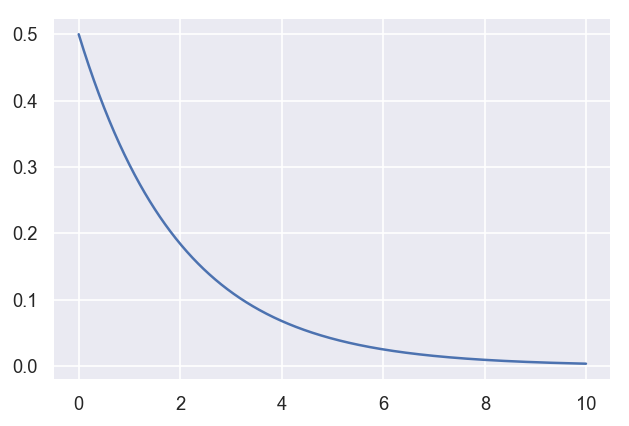

In [15]:
x=np.arange(0,10,0.01)
y=chi2.pdf(x,dof)
plt.figure(dpi=120)
sns.lineplot(x,y)
plt.show()

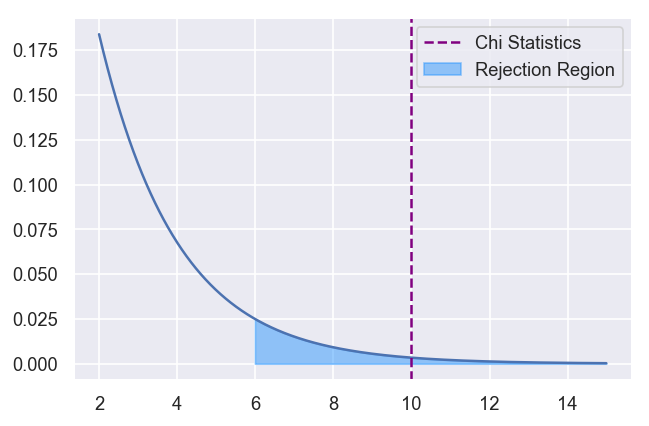

In [16]:
llimit=2
ulimit=15
x=np.arange(llimit,ulimit,0.01)
y=chi2.pdf(x,dof)

xshade=np.arange(chicritical,ulimit,0.01)
yshade=chi2.pdf(xshade,dof)
plt.figure(dpi=120)
sns.lineplot(x,y)

plt.fill_between(xshade,yshade, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.axvline(x=chistatistics, linestyle='--', linewidth=1.5, label="Chi Statistics", c='purple')
plt.legend()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

In [18]:
chistatistics,pvalue,dof,expected=chi2_contingency(df)
print("Chi Statistics ",chistatistics)
print("pvalue",pvalue)
print("Degree of Freedom",dof)
print("Expected value\n",pd.DataFrame(expected))
print("Observed Value\n",pd.DataFrame(df))

Chi Statistics  10.0
pvalue 0.006737946999085468
Degree of Freedom 2
Expected value
       0     1     2
0  20.0  22.5  22.5
1  20.0  22.5  22.5
Observed Value
     0   1   2
0  20  30  15
1  20  15  30


# Student's Performance Dependent on parent's education level

In [19]:
raw=pd.read_csv("StudentsPerformance.csv")
raw.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
raw_melt=pd.melt(raw,id_vars="parental level of education",value_vars=["math score","reading score","writing score"])
raw_melt.head()

,parental level of education,variable,value
0,bachelor's degree,math score,72
1,some college,math score,69
2,master's degree,math score,90
3,associate's degree,math score,47
4,some college,math score,76


In [21]:
pd.crosstab(index=raw_melt["parental level of education"],columns=raw_melt["variable"],
            values=raw_melt["value"],aggfunc="mean")

variable,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [22]:
pd.crosstab(index=raw_melt["parental level of education"],columns=raw_melt["variable"],
            values=raw_melt["value"],aggfunc="sum",margins=True)

variable,math score,reading score,writing score,All
parental level of education,,,,
associate's degree,15070,15746,15517,46333
bachelor's degree,8188,8614,8659,25461
high school,12179,12682,12240,37101
master's degree,4115,4447,4465,13027
some college,15171,15698,15558,46427
some high school,11366,11982,11615,34963
All,66089,69169,68054,203312


In [23]:
raw1=raw.groupby("parental level of education")[["math score","reading score","writing score"]].mean().reset_index()
raw1

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [24]:
df=raw1.iloc[:,1:].values
df

array([[67.88288288, 70.92792793, 69.8963964 ],
       [69.38983051, 73.        , 73.38135593],
       [62.1377551 , 64.70408163, 62.44897959],
       [69.74576271, 75.37288136, 75.6779661 ],
       [67.12831858, 69.46017699, 68.84070796],
       [63.4972067 , 66.93854749, 64.88826816]])

In [25]:
total=np.sum(df)

In [26]:
nrows,ncols=df.shape
print("No of rows ",nrows)
print("No of cols ",ncols)

No of rows  6
No of cols  3


In [27]:
Exp=np.zeros(shape=(nrows,ncols))

for i in range(nrows):
    for j in range(ncols):
        rowtotal=df[i,:].sum()
        coltotal=df[:,j].sum()
        Exp[i,j]=(rowtotal*coltotal/total)

print("Expected Matrix")
print(Exp)

Expected Matrix
[[67.54314536 71.02720933 70.13685252]
 [69.82923496 73.43122181 72.51072967]
 [61.25949024 64.41942573 63.61190036]
 [71.45559435 75.14147335 74.19954247]
 [66.4822971  69.91163955 69.03526689]
 [63.2119945  66.47264561 65.63938224]]


In [28]:
print("Observed Matrix")
Obs=df
print(Obs)

Observed Matrix
[[67.88288288 70.92792793 69.8963964 ]
 [69.38983051 73.         73.38135593]
 [62.1377551  64.70408163 62.44897959]
 [69.74576271 75.37288136 75.6779661 ]
 [67.12831858 69.46017699 68.84070796]
 [63.4972067  66.93854749 64.88826816]]


In [29]:
chistatistics=((Obs-Exp)**2/Exp).reshape(1,-1).sum()
print("The Chi-Statistics is ",chistatistics)

The Chi-Statistics is  0.1475047186386475


In [30]:
np.sum((Obs-Exp)**2/Exp)

0.1475047186386475

In [31]:
dof=(nrows-1)*(ncols-1)
print("Degree of Freedom is ",dof)

Degree of Freedom is  10


In [32]:
chicritical=chi2.ppf(1-0.05,dof)
print("Chi square critical value ",chicritical)

Chi square critical value  18.307038053275146


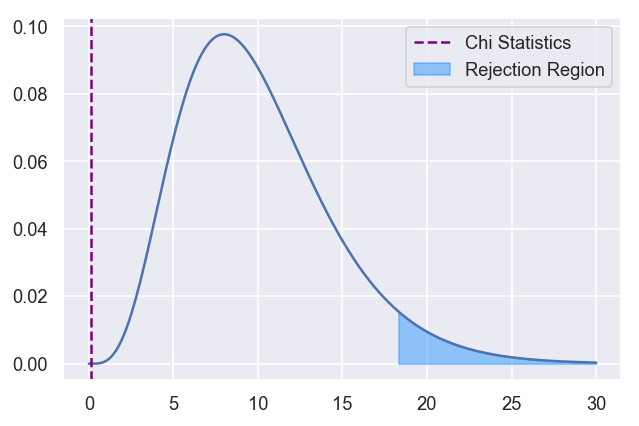

In [33]:
llimit=0
ulimit=30
x=np.arange(llimit,ulimit,0.01)
y=chi2.pdf(x,dof)

xshade=np.arange(chicritical,ulimit,0.01)
yshade=chi2.pdf(xshade,dof)
plt.figure(dpi=120)
sns.lineplot(x,y)

plt.fill_between(xshade,yshade, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.axvline(x=chistatistics, linestyle='--', linewidth=1.5, label="Chi Statistics", c='purple')
plt.legend()
plt.show()

In [34]:
from scipy.stats import chi2_contingency
chistatistics,pvalue,dof,expected=chi2_contingency(df)
print("Chi Statistics ",chistatistics)
print("pvalue",pvalue)
print("Degree of Freedom",dof)
print("Expected value\n",pd.DataFrame(expected))
print("Observed Value\n",pd.DataFrame(df))

Chi Statistics  0.1475047186386475
pvalue 0.9999999828986653
Degree of Freedom 10
Expected value
            0          1          2
0  67.543145  71.027209  70.136853
1  69.829235  73.431222  72.510730
2  61.259490  64.419426  63.611900
3  71.455594  75.141473  74.199542
4  66.482297  69.911640  69.035267
5  63.211994  66.472646  65.639382
Observed Value
            0          1          2
0  67.882883  70.927928  69.896396
1  69.389831  73.000000  73.381356
2  62.137755  64.704082  62.448980
3  69.745763  75.372881  75.677966
4  67.128319  69.460177  68.840708
5  63.497207  66.938547  64.888268
